## Exploracion de Datos!
### Grupo 10
#### Integrantes:
* Dario Balart
* Isidora Mancilla
* Joaquín López
* Cristóbal Suazo

Primero carguemos la librerias correspondientes para usar en el Notebook!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns;sns.set_theme()

print("Ok!")

Ok!


Ahora carguemos los datos, a modo de completitud entregaremos un zip con el "data.csv" con un anexo.

Para contextualizar, estos datos son obtenidos de kaggle, el cual reune canciones de spotify
y todos sus atributos, los cuales a su vez son obtenidos de la API de spotify el cual clasifica estos valores.
Para mas informacion, consulte la siguiente pagina: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features


In [3]:
spot_df = pd.read_csv("data.csv")
spot_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [4]:
#veamos los tipos
spot_df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

Nos resultara comodo despues trabajar con segundos, pues es mas facil e intuitivo,
por lo tanto crearemos una columna pasando de milisegundos a segundos

In [4]:
#Ahora pasaremos la columna duradcion a segundos
spot_df['duration_s'] = spot_df['duration_ms']/1000

Rapidamente veamos un resumen de que trata la tabla.

In [6]:
print("La forma del df es:",spot_df.shape)
spot_df.describe()
#Veamos la forma que tiene el dataset


La forma del df es: (169909, 20)


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,duration_s
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231,231.406159
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168,121.321923
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000,5.108000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000,171.040000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000,208.600000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000,262.960000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000,5403.500000


Chequeemos ahora si tiene valores nulos!

In [7]:
#Chequeamos si spot_df tiene nulos!
print("Cantidad de Nulls")
spot_df.isna().sum()
#spoiler, No tiene nulos!

Cantidad de Nulls


acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
duration_s          0
dtype: int64

Ahora hagamos una exploracion simple, plotiemos un histograma de los artistas "Frédéric Chopin" y "Paramore"
donde podemos ver la cantidad de canciones o colaboraciones que cumplen ciertos parametros, como por ejemplo:
1. Su nivel de popularidad
2. La duracion de la cancion en segundos
3. El año de Lanzamiento

array([[<AxesSubplot:title={'center':'duration_s'}>,
        <AxesSubplot:title={'center':'popularity'}>],
       [<AxesSubplot:title={'center':'year'}>, <AxesSubplot:>]],
      dtype=object)

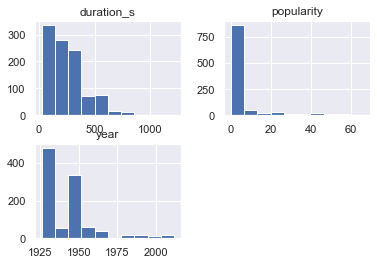

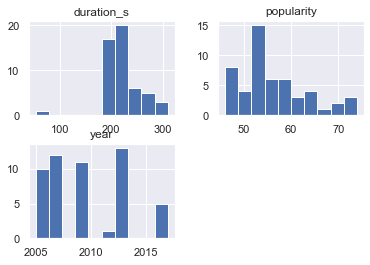

In [8]:
#Hacemos un scatter plot de la popularidad 
art1=spot_df[spot_df.artists.str.contains("Frédéric Chopin")]
art1[["duration_s","popularity","year"]].hist()
art2=spot_df[spot_df.artists.str.contains("Paramore")]
art2[["duration_s","popularity","year"]].hist()
#art1=spot_df[spot_df.artists.str.contains("Bad Bunny")]
#art1[["duration_s","popularity","year"]].hist()
#art1=spot_df[spot_df.artists.str.contains("J Balvin")]
#art1[["duration_s","popularity","year"]].hist()

Ahora apliquemos algo que vimos en clases, sabemos que el coeficiente de pearson donde cumple que
para dos variables aleatorias $X,Y$ $$\rho(X,Y)=\frac{Cov(X,Y)}{sd(X)sd(Y)}$$ Indica que tan corelacionadas estan uans variables con las otras, luego como esto define una matriz, podemos visualizar esto con un mapa de calor
(Heatmap), pero como solo nos interesa si hay una corelacion(no importa si es directa o inversa, estamos explorando)
entonces luego de obtener la matriz de correlacion, le aplicaremos valor absoluto y luego usaremos el heatmap.

Y por ejemplo, si queremos que la correlacion sea por ejemplo $\geq 0.5$, entonces podemos aplicar el filtro y ver que variables se correlacionan con un coeficiente mayor a $0.5$

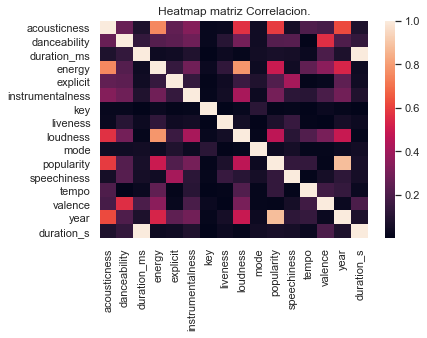

In [10]:
plt.title("Heatmap matriz correlacion.")
ax = sns.heatmap(spot_df.corr(method='pearson').abs())


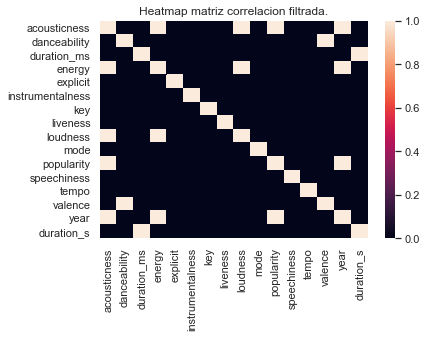

In [11]:
#caso donde aplicamos el filtro
plt.title("Heatmap matriz correlacion filtrada.")
ax = sns.heatmap(spot_df.corr(method='pearson').abs()>=0.5)

Ahora queremos ver, como los atributos como por ejemplo: `'energy','valence','danceability','acousticness'`
Cambian a medida que pasa el tiempo, entonces los podemos agrupar por año y luego aplicar el promedio a cada agrupacion
y de ahí lo podemos plotear

<ipython-input-12-74b50fd20296>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  spot_df\


<AxesSubplot:title={'center':'Atributos a traves de los años'}, xlabel='year'>

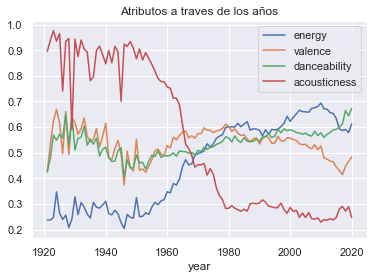

In [12]:
spot_df\
  .groupby(['year'])['energy','valence','danceability','acousticness']\
  .mean().plot(title = 'Atributos a traves de los años')


Apliquemos ahora la tecnica del boxplot a la duracion de las canciones

<AxesSubplot:title={'center':'Boxplot duracion en segundos'}>

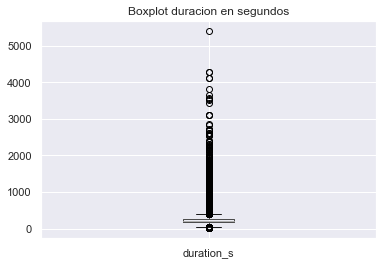

In [15]:
plt.title("Boxplot duracion en segundos")
spot_df.boxplot(['duration_s'])

Notemos que esta llenisimo de outliers y eso hace que se vea muy mal el boxplot, por lo tanto
podemos aplicar la tecnica vista el el lab 1.2 (la actividad de Z>3 o Z<-3) para trimmear los valores 
y así obtener un boxplot con menos outliers

In [16]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        #print('Working on column: {}'.format(col))
        mean = df[col].mean()
        sd = df[col].std()
        df = df[((mean-n_std*sd)<=df[col]) & (df[col] <= (mean+n_std*sd))]
    #print("Ended")  
    return df
spot_df_trimmed = remove_outliers(spot_df,["duration_s"],1.5)
mean_song=spot_df_trimmed.duration_s.mean()
print(mean_song,spot_df.duration_s.mean())

214.06086118929124 231.40615897333237


<AxesSubplot:title={'center':'Boxplot duracion en segundos(trimmed)'}>

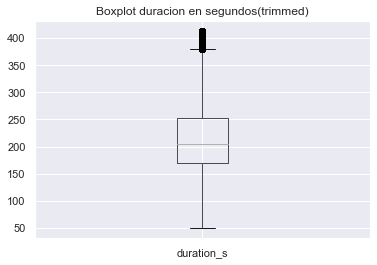

In [17]:
plt.title("Boxplot duracion en segundos(trimmed)")
spot_df_trimmed.boxplot(['duration_s'])
#mucho menos outliers 

Aqui queremos ver como se diferencian años dados, según una cierta lista de atributos `L`, via 
varios histogramas, donde contamos la cantidad de canciones

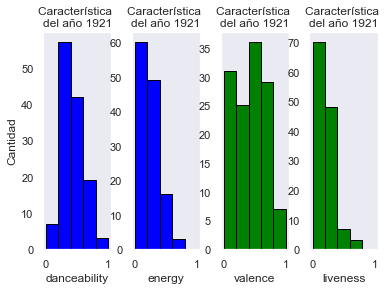

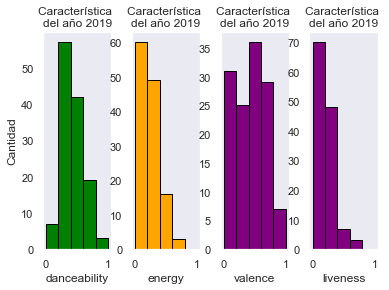

In [22]:
a=spot_df[(spot_df["year"]==1921)] #Aquí filtramos el 1ero año
#el año mínimo es 1921, y el año mayor es 2020 
#version mas general, definitiva
def histo_colm2(dataframe,lista,coloredge,año):
    fig, axes= plt.subplots(1,len(lista))
    #colocamos el label de y solo en el 1er histograma, para que no se solape con los datos
    axes[0].set_ylabel("Cantidad")
    #creamos los histogramos para valor de la lista
    for i in range(0,len(lista)):
        #variable random para los colores
        ran=np.random.randint(1,7)
        M=["black","blue","purple","orange","green","#960018","#FF2400"]
        #Creamos el histograma
        var_b=dataframe.hist(column=lista[i],bins=[0,0.2,0.4,0.6,0.8,1],grid=False,
                        color=M[ran],figsize=(50,5),edgecolor=coloredge,ax=axes[i])
        
        #ponemos los labels de x y los títulos
        axes[i].set_title("Característica \n" + "del año "+ str(año))
        
        axes[i].set_xlabel(lista[i])
    return
    
#funcion para recorrer distintos años
def features_cada_x_años(inicio,fin,dt,lista): 
    for i in range(inicio,fin+1,dt):
        #filtramos por año
        b=spot_df[(spot_df["year"]==inicio)] #no entregamos el dataframe ni la col como parámetros
        #vemos el histograma de las features con rango (0,1)
        L=lista
        histo_colm2(b,lista,"black",i)
    return 
#Ahora queremos extraer la información, para graficarla
#Idealmente me gustaría hacer, promedio de ciertas características por año
def extraer_info_col(col,init,end):
    L=[] #lista para almacenar los valores
    for i in range(init,end):
        b=spot_df[(spot_df["year"]==i)] #filtro específico
        L.append((i,b[col].mean()))
    return L

L=["danceability","energy","valence","liveness"]
features_cada_x_años(1921,2019,98,L)
#extraer_info_col(L[1],1921,2020)
#extraer_info_col(L[0],1921,2020)
#extraer_info_col(L[2],1921,2020)
#extraer_info_col(L[3],1921,2020)
#histo_colm2(spot_df,L,"black",2000)